# <font color=darkcyan>  Expectation Maximization for latent data models </font>

In the case where we are interested in estimating unknown parameters $\theta\in\mathbb{R}^m$ characterizing a model with missing data, the Expectation Maximization (EM) algorithm (Dempster et al. 1977) can be used when the joint distribution of the missing data $Z$ and the observed data $X$ is explicit. For all $\theta\in\mathbb{R}^m$, let $p_{\theta}$ be the probability density function of $(Z,X)$ when the model is parameterized by $\theta$ with respect to a given reference measure $\mu$. The EM algorithm aims at computing iteratively an approximation of the maximum likelihood estimator which maximizes the observed data loglikelihood:

$$
\ell(\theta;X) = \log p_{\theta}(X) =\log \int p_{\theta}(z,X)\mu(\mathrm{d}z)\,.
$$

As this quantity cannot be computed explicitly in general cases, the EM algorithm finds the maximum likelihood estimator by iteratively maximizing the expected complete data loglikelihood.
 
Start with an inital value $\theta^{(0)}$ and let $\theta^{(t)}$ be the estimate at the $t$-th iteration for $t\geqslant 0$, then the next iteration of EM is decomposed into two steps. 

1. E-step. Compute the expectation of the complete data loglikelihood, with respect to the conditional distribution of the missing data given the observed data parameterized by $\theta^{(t)}$:

$$
Q(\theta,\theta^{(t)}) =\mathbb{E}_{\theta^{(t)}}\left[\log p_{\theta}(Z,X)|X \right]\,.
$$

2. M step. Determine $\theta^{(t+1)}$ by maximizing the function Q:

$$
\theta^{(t+1)}\in \mbox{argmax}_\theta Q(\theta,\theta^{(t)})\,.
$$


#### Question 1 
Prove the following crucial property motivates the EM algorithm.  
For all $\theta,\theta^{(t)}$,
    
$$
\ell(X;\theta) - \ell(X;\theta^{(t)}) \geqslant Q(\theta,\theta^{(t)})-Q(\theta^{(t)},\theta^{(t)})\,.
$$

This may be proved by noting that

$$
\ell(X;\theta) = \log \left(\frac{p_{\theta}(Z,X)}{p_{\theta}(Z|X)}\right)\,.
$$

Considering the conditional expectation of both terms given $X$ when the parameter value is $\theta^{(t)}$ yields

$$
\ell(X;\theta) = Q(\theta,\theta^{(t)}) - \mathbb{E}_{\theta^{(t)}}[\log p_{\theta}(Z|X)|X]\,.
$$

Then,

$$
\ell(X;\theta) - \ell(X;\theta^{(t)}) = Q(\theta,\theta^{(t)})-Q(\theta^{(t)},\theta^{(t)}) + H(\theta,\theta^{(t)}) - H(\theta^{(t)},\theta^{(t)})\,,
$$

where

$$
H(\theta,\theta^{(t)}) = - \mathbb{E}_{\theta^{(t)}}[\log p_{\theta}(Z|X)|X]\,.
$$

The proof is completed by noting that

$$
H(\theta,\theta^{(t)}) - H(\theta^{(t)},\theta^{(t)})\geqslant 0\,,
$$

as this difference if a Kullback-Leibler divergence. 

In the following, $Z = (Z_1,\ldots,Z_n)$ and $X = (X_1,\ldots,X_n)$ where $\{(Z_i,X_i)\}_{1\leqslant i\leqslant n}$  are i.i.d. in $\{-1,1\} \times \mathbb{R}^d$. For $k\in\{-1,1\}$, write $\pi_k = \mathbb{P}_\theta(Z_1 = k)$. Assume that, conditionally on the event $\{Z_1 = k\}$, $X_1$ has a Gaussian distribution with mean $\mu_k \in\mathbb{R}^d$ and covariance matrix $\Sigma\in \mathbb{R}^{d\times d}$. In this case, the parameter $\theta=(\pi_1, \mu_1,\mu_{-1}, \Sigma)$ belongs to the set $\Theta= [0,1] \times \mathbb{R}^d \times \mathbb{R}^d \times \mathbb{R}^{d \times d}$. For all $t\geq 0$, the parameter $\theta^{(t)}$ is written
$$
\theta^{(t)} = \left\{\pi^{(t)}_1, \mu^{(t)}_1,\mu^{(t)}_{-1}, \Sigma^{(t)}\right\}\,.
$$

#### Question 2
- Write the complete data loglikelihood
- Let $\theta^{(t)}$ be the current parameter estimate. Compute $\theta\mapsto Q(\theta,\theta^{(t)})$.

The complete data loglikelihood  is given by

$$
\log p_{\theta}\left(Z,X\right) = - \frac{nd}{2} \log(2\pi)+\sum_{i=1}^n\sum_{k\in\{-1,1\}}1_{Z_i=k}\left(\log \pi_{k} -\frac{\log \det \Sigma}{2} - \frac{1}{2}\left(X_i - \mu_{k}\right)^\top\Sigma^{-1}\left(X_i - \mu_{k}\right)\right)\,,
$$
which yields
$$
\log p_{\theta}\left(Z,X\right) = - \frac{nd}{2} \log(2\pi)-\frac{n}2 \log\det\Sigma + \left(\sum_{i=1}^n 1_{Z_i=1}\right)\log \pi_1 + \left(\sum_{i=1}^n 1_{Z_i=-1}\right)\log (1-\pi_{1}) -  \frac{1}{2}\sum_{i=1}^n 1_{Z_i=1}\left(X_i - \mu_{1}\right)^\top\Sigma^{-1}\left(X_i - \mu_{1}\right) -  \frac{1}{2}\sum_{i=1}^n 1_{Z_i=-1}\left(X_i - \mu_{-1}\right)^\top\Sigma^{-1}\left(X_i - \mu_{-1}\right)\,.
$$

Write $\omega_t^i = \mathbb{P}_{\theta^{(t)}}(Z_i=1|X_i)$. The intermediate quantity of the EM algorithm is given by

$$
Q(\theta,\theta^{(t)}) = - \frac{nd}{2} \log(2\pi)-\frac{n}2 \log\det\Sigma + \left(\sum_{i=1}^n\omega_t^i \right)\log \pi_1 + \sum_{i=1}^n\left(1 - \omega_t^i \right)\log (1-\pi_{1}) -  \frac{1}{2}\sum_{i=1}^n\omega_t^i \left(X_i - \mu_{1}\right)^\top\Sigma^{-1}\left(X_i - \mu_{1}\right) -  \frac{1}{2}\sum_{i=1}^n(1-\omega_t^i )\left(X_i - \mu_{-1}\right)^\top\Sigma^{-1}\left(X_i - \mu_{-1}\right)\,.
$$

The gradient of $Q(\theta,\theta^{(t)})$ with respect to $\theta$ is therefore given by

$$
\frac{\partial Q(\theta,\theta^{(t)})}{\partial \pi_1} = \frac{\sum_{i=1}^n\omega_t^i}{\pi_1} - \frac{n-\sum_{i=1}^n\omega_t^i}{1-\pi_{1}}\,,
$$

$$
\frac{\partial Q(\theta,\theta^{(t)})}{\partial \mu_1} = \sum_{i=1}^n\omega_t^i\left(2\Sigma^{-1}X_i - 2\Sigma^{-1}\mu_{1}\right)\,,
$$

$$
\frac{\partial Q(\theta,\theta^{(t)})}{\partial \mu_{-1}} = \sum_{i=1}^n(1-\omega_t^i)\left(2\Sigma^{-1}X_i - 2\Sigma^{-1}\mu_{-1}\right)\,,
$$

$$
\frac{\partial Q(\theta,\theta^{(t)})}{\partial \Sigma^{-1}} = \frac{n}{2}\Sigma -  \frac{1}{2}\sum_{i=1}^n\omega_t^i\left(Y_i - \mu_{1}\right)\left(X_i - \mu_{1}\right)^\top -  \frac{1}{2}\sum_{i=1}^n(1-\omega_t^i)\left(X_i - \mu_{-1}\right)\left(X_i - \mu_{-1}\right)^\top\,.
$$


Then, $\theta^{(t+1)}$ is defined as the only parameter such that all these equations are set to 0. It is given by

$$
 \pi_1^{(t+1)} = \frac{1}{n}\sum_{i=1}^n\omega_t^i\,,
$$

$$
\mu_1^{(t+1)} = \frac{1}{\sum_{i=1}^n\omega_t^i}\sum_{i=1}^n\omega_t^i\,X_i\,,
$$

$$
\Sigma^{(t+1)} = \frac{1}{n}\sum_{i=1}^n\omega_t^i\left(X_i - \mu_{1}^{(t+1)}\right)\left(X_i - \mu_{1}^{(t+1)}\right)^\top +  \frac{1}{n}\sum_{i=1}^n(1-\omega_t^i)\left(X_i - \mu_{-1}^{(t+1)}\right)\left(X_i - \mu_{-1}^{(t+1)}\right)^\top\,.
$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

#### <font color=darkorange>  Simulated data</font>

#### Question 3
- Sample data from a mixture of two Gaussian distributions and display the associated histogram

In [6]:
# number of observations
n_samples = 1000

# means and variance to be estimated
mu1, sigma1 = -2, 1.5
mu2, sigma2 = 3, 1

# prior probability of the first cluster/goup 
pi1 = 0.3

x1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples)
x2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples)

X = np.zeros(n_samples)
U = np.random.uniform(0,1,n_samples)
for idx in range(n_samples):
    if U[idx]<pi1:
        X[idx] = x1[idx]
    else:
        X[idx] = x2[idx]

In [7]:
def Gaussian_pdf(x, mean, variance):
  z = np.exp(-(x - mean)**2/(2*variance))/np.sqrt(2*np.pi*variance)
  return z

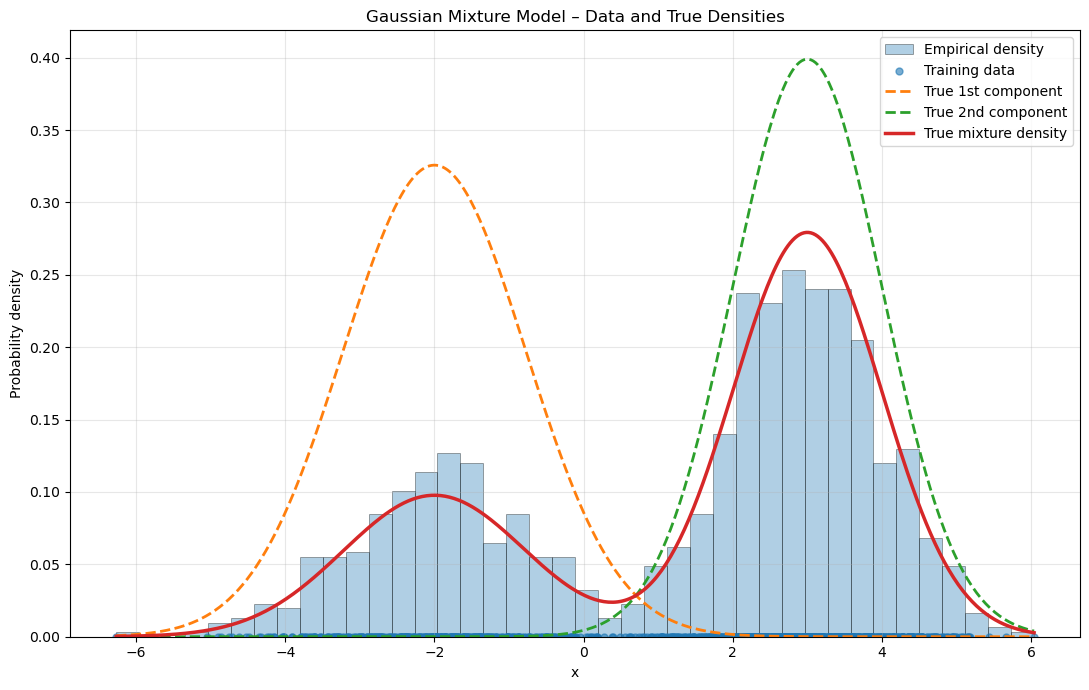

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Grid for densities
bins = np.linspace(np.min(X), np.max(X), 400)

plt.figure(figsize=(11, 7))

# Histogram of the data (density)
plt.hist(
    X,
    bins=40,
    density=True,
    alpha=0.35,
    edgecolor="black",
    linewidth=0.7,
    label="Empirical density"
)

# Training data as rug plot
plt.scatter(
    X,
    np.zeros_like(X),
    s=25,
    alpha=0.6,
    label="Training data"
)

# Individual Gaussian components
plt.plot(
    bins,
    Gaussian_pdf(bins, mu1, sigma1),
    linestyle="--",
    linewidth=2,
    label="True 1st component"
)

plt.plot(
    bins,
    Gaussian_pdf(bins, mu2, sigma2),
    linestyle="--",
    linewidth=2,
    label="True 2nd component"
)

# Mixture density
plt.plot(
    bins,
    pi1 * Gaussian_pdf(bins, mu1, sigma1)
    + (1 - pi1) * Gaussian_pdf(bins, mu2, sigma2),
    linewidth=2.5,
    label="True mixture density"
)

# Labels and layout
plt.xlabel("x")
plt.ylabel("Probability density")
plt.title("Gaussian Mixture Model – Data and True Densities")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### <font color=darkorange>  EM algorithm</font>

In [ ]:
# plot estimated density
def plot_pdf(X, pi1, mu1, mu2, sigma1, sigma2, w, means, variances, it):
    plt.figure(figsize=(10,8))
    
    plt.subplot(1,2,1)
    plt.xlabel("$x$")
    plt.ylabel("probability density")
    plt.title("Iteration {}".format(it))

    plt.plot(bins, Gaussian_pdf(bins, mu1, sigma1), alpha = 0.8, color='red', label="True 1st density")
    plt.plot(bins, Gaussian_pdf(bins, mu2, sigma2), alpha = 0.8, color='k', label="True 2nd density")

    plt.plot(bins, Gaussian_pdf(bins, means[0], variances[0]), linestyle = 'dashed', alpha = 0.5, color='red', label="Estimated 1st density")
    plt.plot(bins, Gaussian_pdf(bins, means[1], variances[1]), linestyle = 'dashed', alpha = 0.5, color='k', label="Estimated 2nd density")
    
    plt.tick_params(labelright=True)
    plt.grid('True')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.xlabel("$x$")
    plt.ylabel("probability density")
    plt.title("Iteration {}".format(it))
    
    plt.plot(bins, pi1*Gaussian_pdf(bins, mu1, sigma1) + (1-pi1)*Gaussian_pdf(bins, mu2, sigma2), alpha = 0.5, color='b', label="True mixture density")
    plt.plot(bins, w*Gaussian_pdf(bins, means[0], variances[0]) + (1-w)*Gaussian_pdf(bins, means[1], variances[1]), linestyle = 'dashed', alpha = 0.5, color='b', label="Estimated mixture density")
    plt.tick_params(labelright=True)
    plt.grid('True')
    plt.legend()
    plt.tight_layout()
    return

In [14]:
def plot_pdf(
    X,
    pi1, mu1, mu2, sigma1, sigma2,
    w, means, variances,
    bins,
    it
):
    import matplotlib.pyplot as plt
    import numpy as np

    fig, ax = plt.subplots(
        1, 2,
        figsize=(13, 6),
        constrained_layout=True
    )

    # Shared histogram (background)
    for a in ax:
        a.hist(
            X,
            bins=40,
            density=True,
            alpha=0.25,
            edgecolor="black",
            linewidth=0.6
        )
        a.set_xlabel(r"$x$")
        a.set_ylabel("Probability density")
        a.grid(True, alpha=0.3)

    # -------- Left panel: components --------
    ax[0].set_title(f"Gaussian components – iteration {it}")

    # True components
    ax[0].plot(
        bins,
        Gaussian_pdf(bins, mu1, sigma1),
        linewidth=2,
        label="True component 1"
    )
    ax[0].plot(
        bins,
        Gaussian_pdf(bins, mu2, sigma2),
        linewidth=2,
        label="True component 2"
    )

    # Estimated components
    ax[0].plot(
        bins,
        Gaussian_pdf(bins, means[0], variances[0]),
        linestyle="--",
        linewidth=2,
        label="Estimated component 1"
    )
    ax[0].plot(
        bins,
        Gaussian_pdf(bins, means[1], variances[1]),
        linestyle="--",
        linewidth=2,
        label="Estimated component 2"
    )

    ax[0].legend()

    # -------- Right panel: mixtures --------
    ax[1].set_title(f"Mixture density – iteration {it}")

    # True mixture
    ax[1].plot(
        bins,
        pi1 * Gaussian_pdf(bins, mu1, sigma1)
        + (1 - pi1) * Gaussian_pdf(bins, mu2, sigma2),
        linewidth=2.5,
        label="True mixture"
    )

    # Estimated mixture
    ax[1].plot(
        bins,
        w * Gaussian_pdf(bins, means[0], variances[0])
        + (1 - w) * Gaussian_pdf(bins, means[1], variances[1]),
        linestyle="--",
        linewidth=2.5,
        label="Estimated mixture"
    )

    ax[1].legend()

    plt.show()

#### Question 5
 - Compute $\omega_t^i = \mathbb{P}_{\theta^{(t)}}(Z_i=1|X_i)$.
 - Write the loop of the EM algorithm.
 - Run the algorithm and display the loglikelihood and the estimates along iterations.


Write, for all $1\leqslant i\leqslant n$,

$$
\omega_t^i = \mathbb{P}_{\theta^{(t)}}(Z_i=1|X_i) = \frac{\pi^{(t)}_1 g^{(t)}_1(X_i)}{\pi^{(t)}_1 g^{(t)}_1(X_i) + (1-\pi^{(t)}_1) g^{(t)}_{-1}(X_i)}\,,
$$

where, for $j\in\{-1,1\}$, $g^{(t)}_j$ is the likelihood (density) of the observation $X_i$ given the event $\{Z_i=j\}$ when the model is parameterized by $\theta^{(t)}$ (Gaussian distribution with mean $\mu_{j}^{(t)}$ and variance $\Sigma$):

$$
g^{(t)}_j: x \mapsto  \mathrm{det}(2\pi\Sigma^{(t)})^{-1/2}\times\mathrm{exp}\left\{-(x-\mu_j^{(t)})^\top(\Sigma^{(t)})^{-1}(x-\mu_j^{(t)})/2\right\}\,.
$$

In [10]:
n_clust = 2
weights = np.ones((n_clust)) / n_clust
means = [0, 1]
variances = [0.5, 2]

In [11]:
# number of iterations of the EM algorithm
n_it = 100

In [12]:
pi1_est = np.zeros(n_it+1)
mu1_est = np.zeros(n_it+1)
mu2_est = np.zeros(n_it+1)
sigma1_est = np.zeros(n_it+1)
sigma2_est = np.zeros(n_it+1)

pi1_est[0] = weights[0]
mu1_est[0] = means[0]
mu2_est[0] = means[1]
sigma1_est[0] = variances[0]
sigma2_est[0] = variances[1]

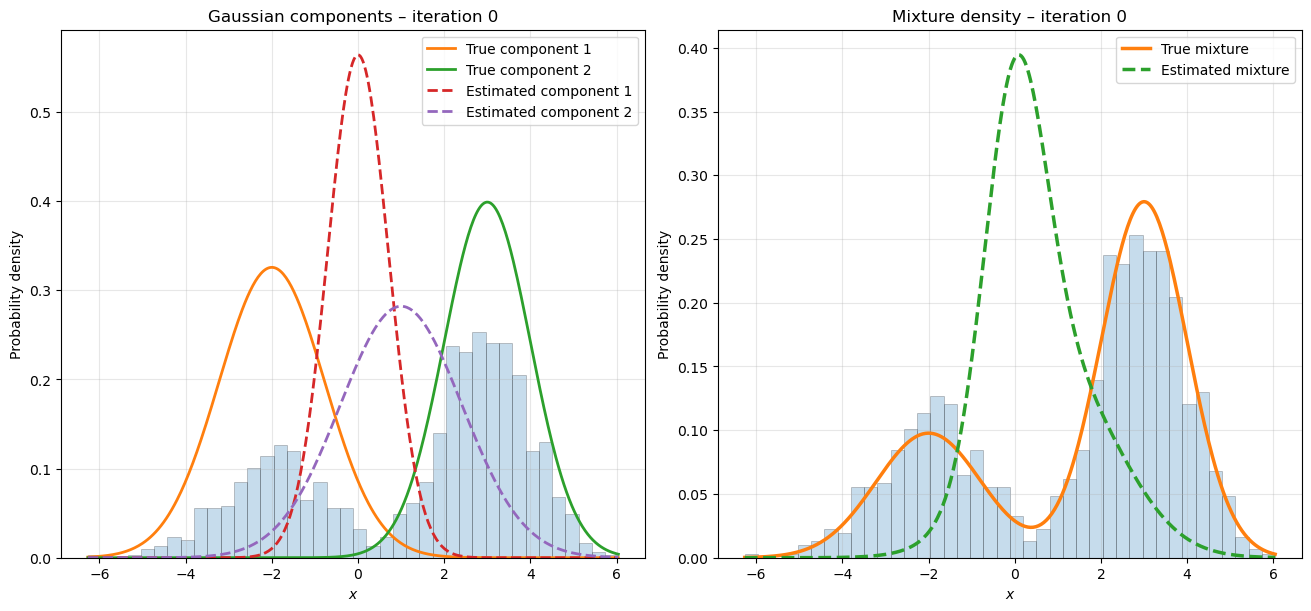

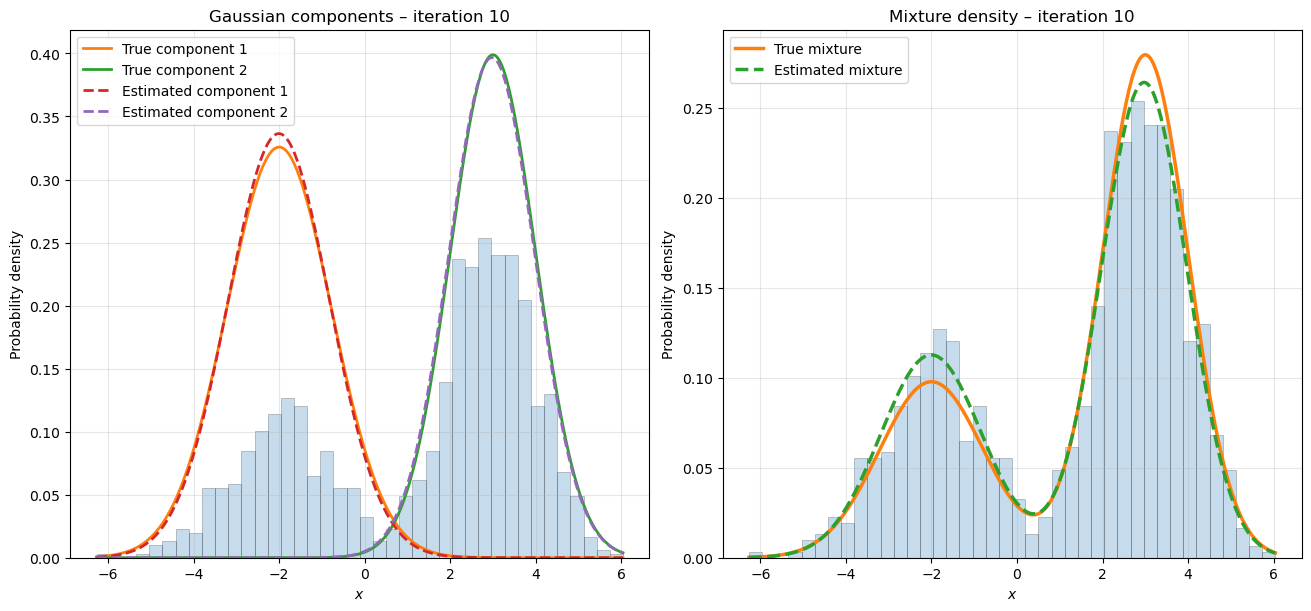

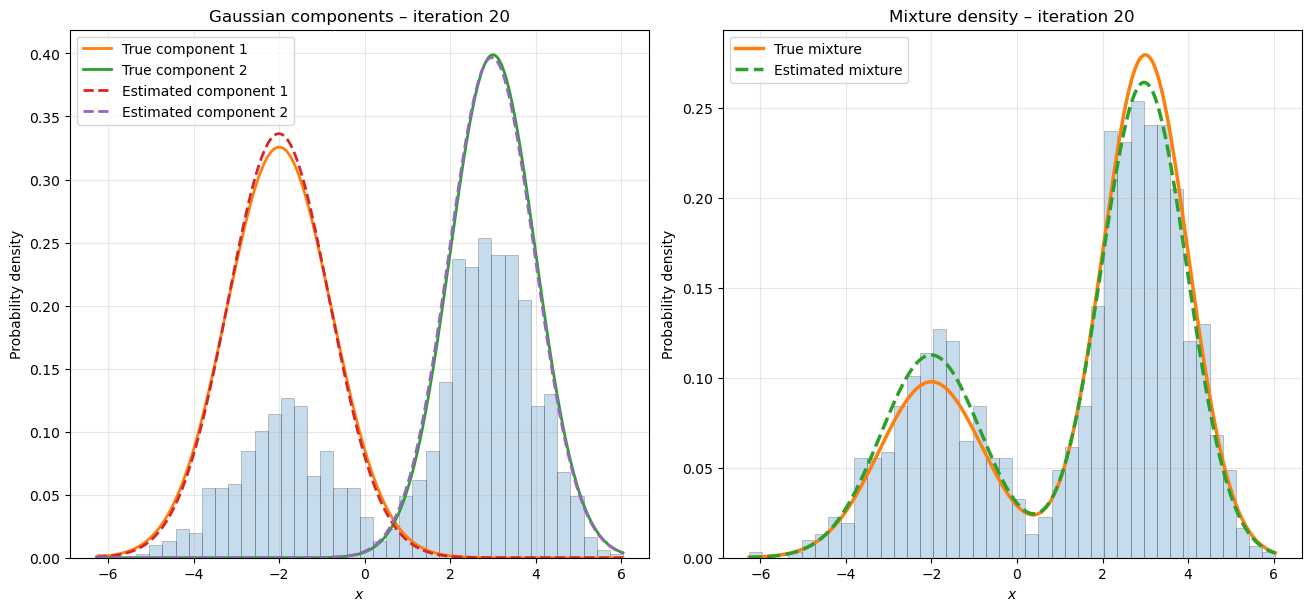

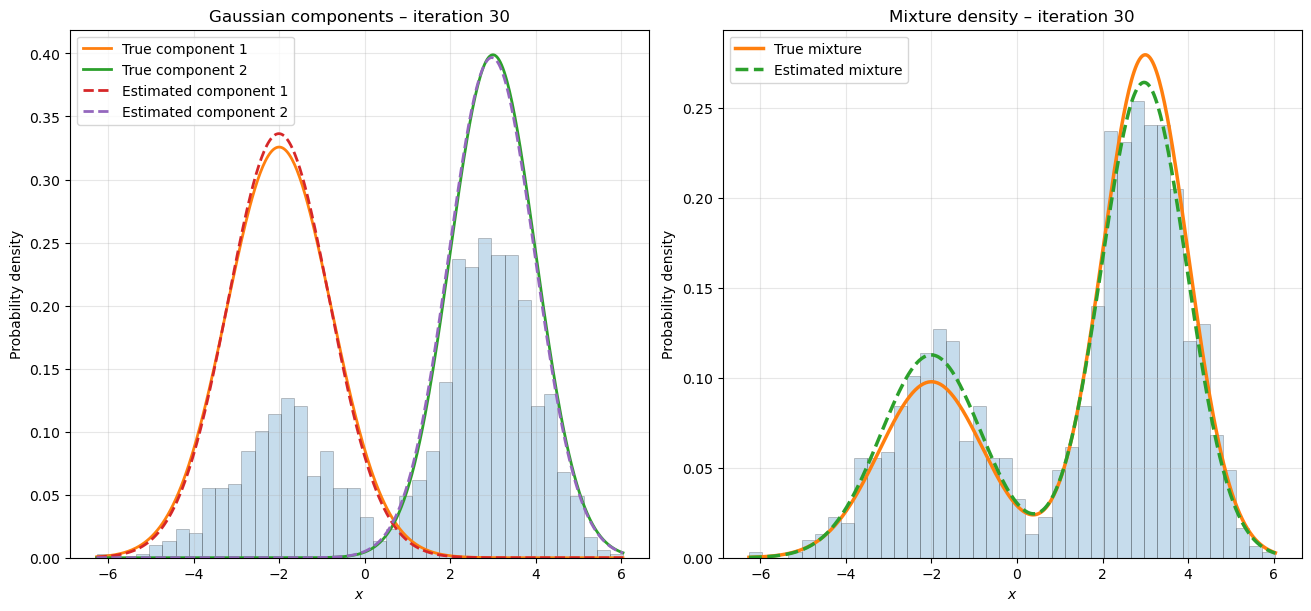

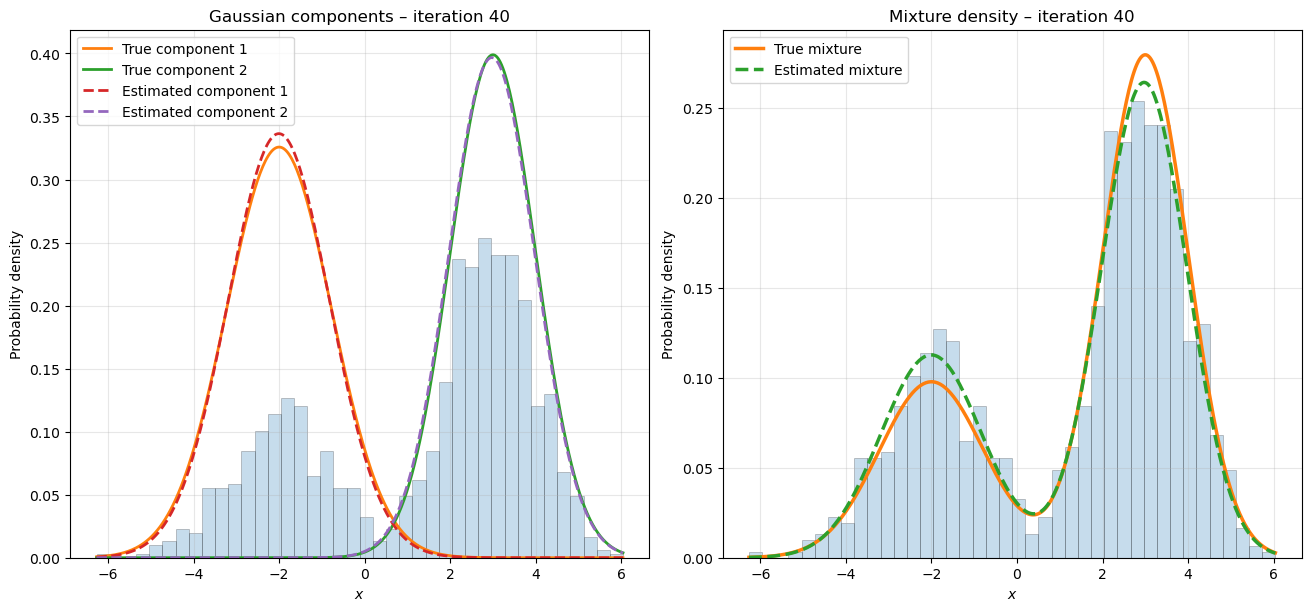

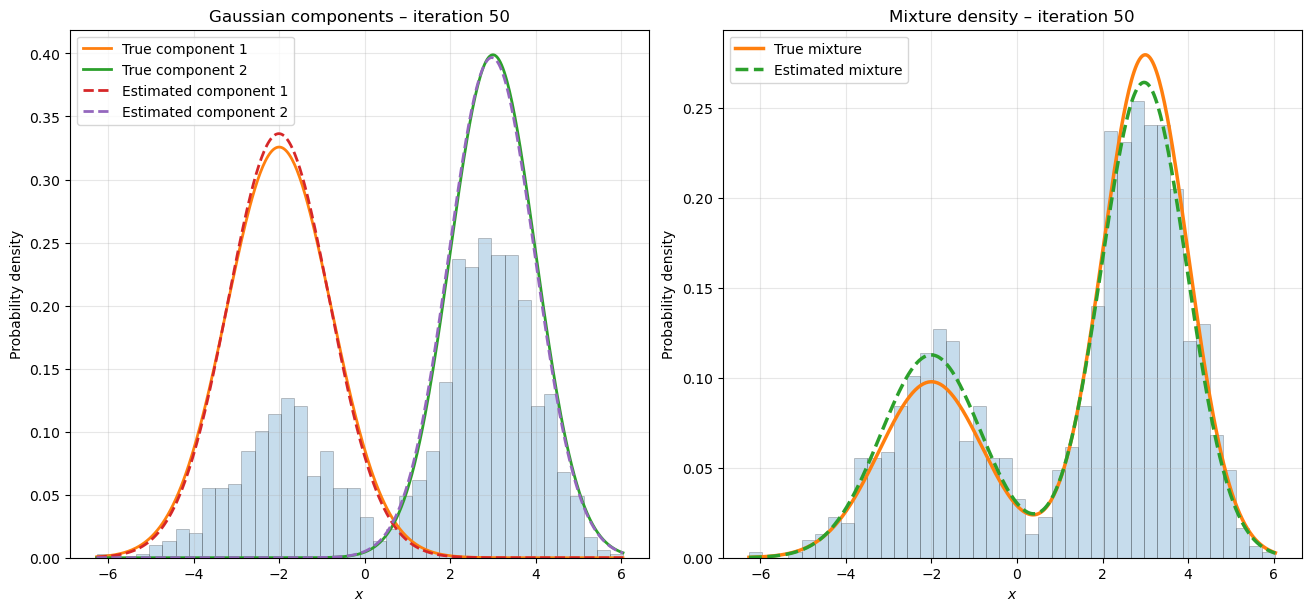

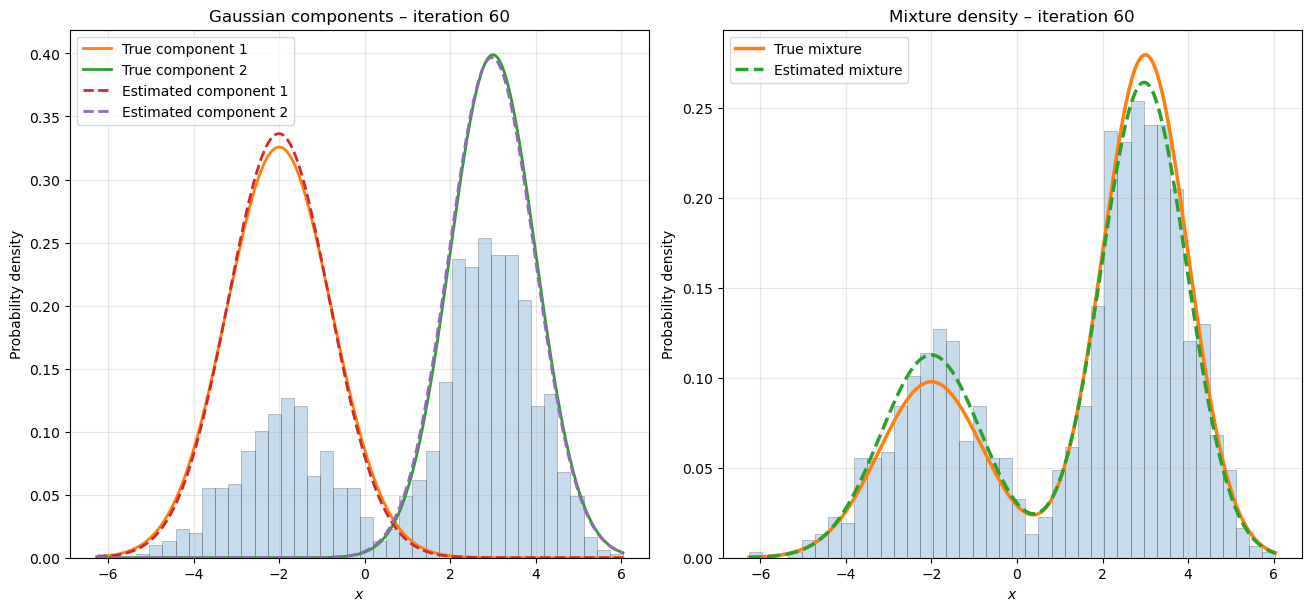

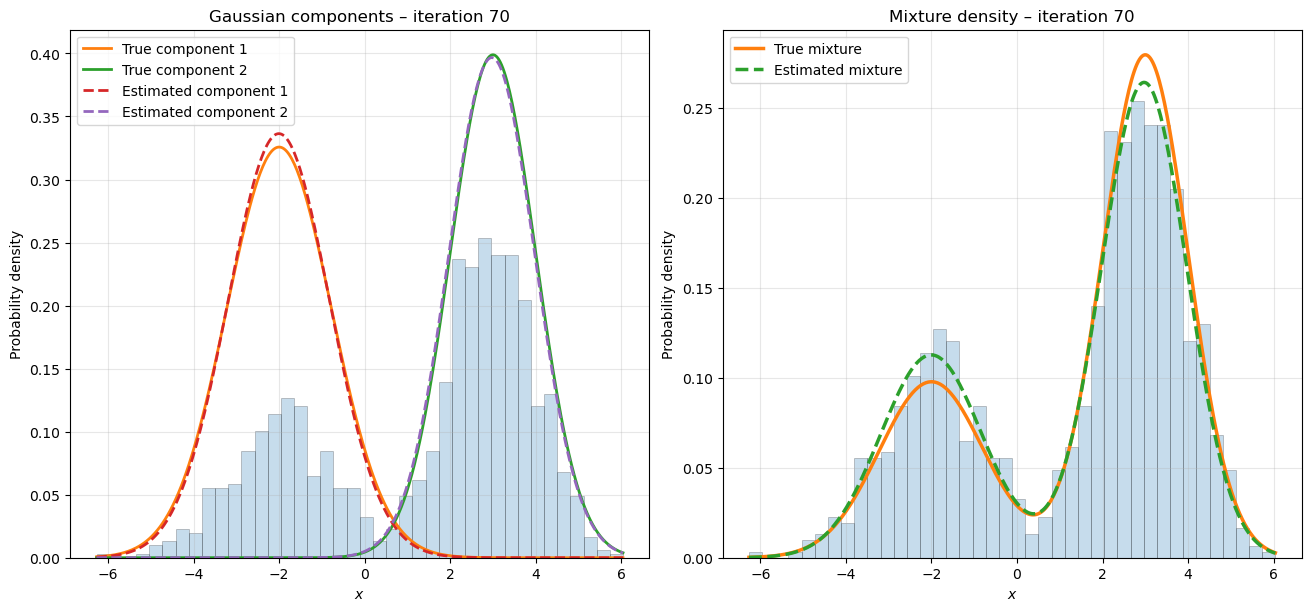

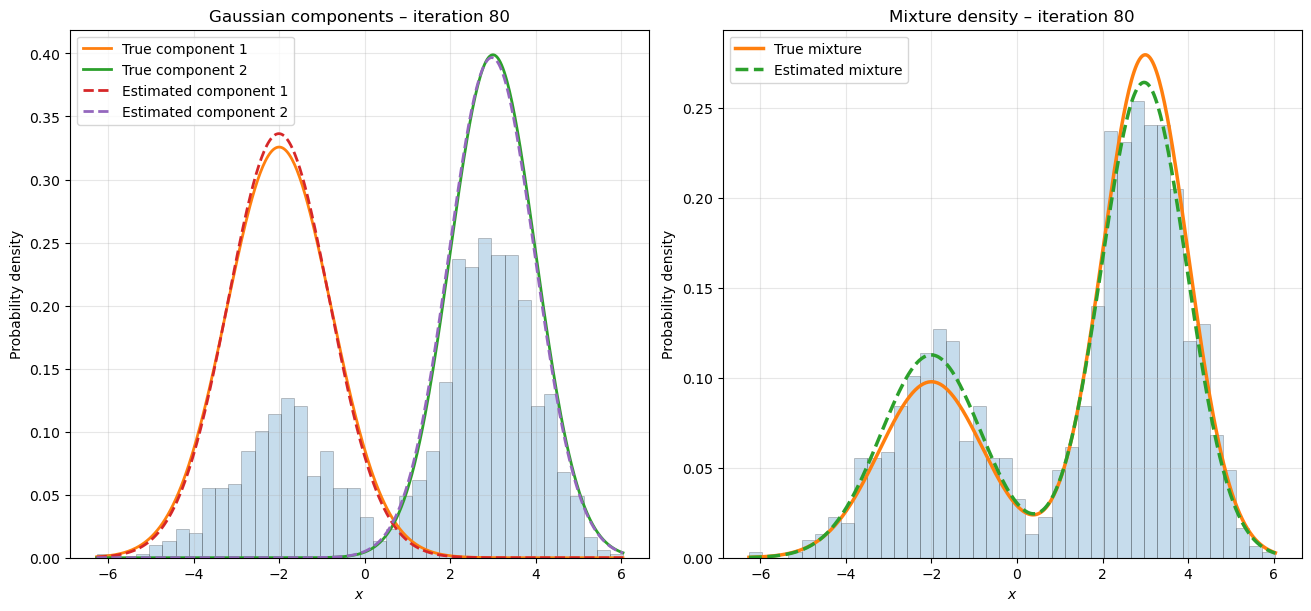

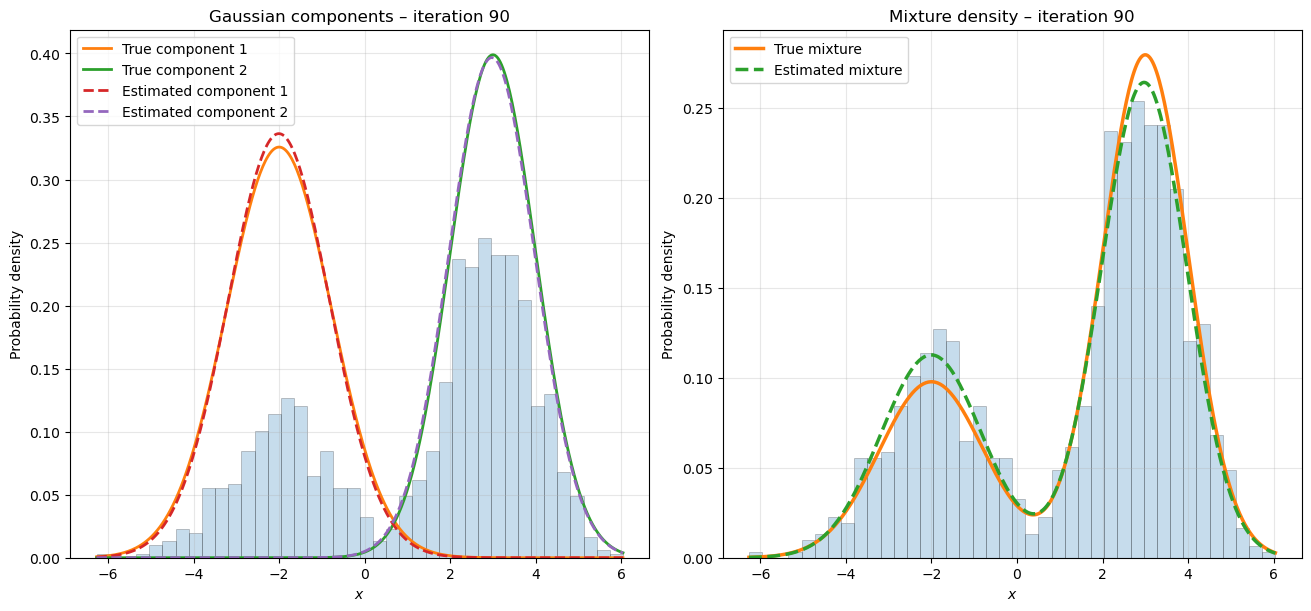

In [16]:
loglikelihood = np.zeros(n_it)
for it in range(n_it):
    
    if it%10 == 0:
        plot_pdf(X, pi1, mu1, mu2, sigma1, sigma2, weights[0] ,means, variances, bins, it)
    
    # Likelihood of all data for each cluster
    likelihood = []
    weightedlik = []
    for j in range(n_clust):
        likelihood.append(Gaussian_pdf(X, means[j], np.sqrt(variances[j])))
        weightedlik.append(weights[j]*likelihood[j])
    likelihood = np.array(likelihood)
    weightedlik = np.array(weightedlik)
    
    
    
    w = [] 
    # E & M  steps 
    for j in range(n_clust):  
        # copute posterior probabilities (w_{it})
        w.append((weightedlik[j]) / (np.sum([weightedlik[i] for i in range(n_clust)], axis=0)))
        # updage mean and variance
        means[j] = np.sum(w[j] * X) / (np.sum(w[j]))
        variances[j] = np.sum(w[j] * np.square(X - means[j])) / (np.sum(w[j]))
    
        # update the weights
        weights[j] = np.mean(w[j])
        
    weightedlik = np.sum(weightedlik,1)
    loglikelihood[it] = np.sum(np.log(weightedlik))/n_samples
    
    pi1_est[it+1] = weights[0]
    mu1_est[it+1] = means[0]
    mu2_est[it+1] = means[1]
    sigma1_est[it+1] = variances[0]
    sigma2_est[it+1] = variances[1]

In [ ]:
# plot loglikelihood along iterations
plt.figure(figsize=(10,8))
plt.xlabel("Iteration")
plt.ylabel("Loglikelihood")
   
plt.plot(range(np.size(loglikelihood)), loglikelihood, alpha = 0.8, color='red')
   
plt.tick_params(labelright=True)
plt.grid('True')
plt.legend()

In [ ]:
# plot parameters along iterations
plt.figure(figsize=(10,8))
plt.xlabel("Iteration")
plt.ylabel("Parameters values")
   
plt.plot(range(n_it+1), pi1_est, linestyle = 'dashed', alpha = 0.8, color='red', label = '$\pi_1$')
plt.plot(range(n_it+1), mu1_est, linestyle = 'dashed', alpha = 0.8, color='k', label = '$\mu_1$')
plt.plot(range(n_it+1), mu2_est, linestyle = 'dashed', alpha = 0.8, color='k', label = '$\mu_{-1}$')
plt.plot(range(n_it+1), sigma1_est, linestyle = 'dashed', alpha = 0.8, color='orange', label = '$\sigma_1$')
plt.plot(range(n_it+1), sigma2_est, linestyle = 'dashed', alpha = 0.8, color='orange', label = '$\sigma_{-1}$')

plt.tick_params(labelright=True)
plt.grid('True')
plt.legend()

<font color=darkred> Explore the sensitivity of the algorithm with respect to i) the initial estimates, ii) the number of iterations, iii) the number of observations and iv) the number of clusters. </font>